<a href="https://colab.research.google.com/github/tbradshaw91/Predictive-Modeling-Sprint_Challenge/blob/master/Predictive_Modeling_Sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://i.pinimg.com/originals/bb/ca/35/bbca3547ca805f09f12fa52d8f010be1.png)

## **Imports**

In [200]:
!pip install category_encoders

### All of the libraries..may or may not use them all 

In [0]:
# All the imports..just because I am a neat freak
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
import category_encoders as ce
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import choice
import time
# Sklearn Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Sklearn Preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, PolynomialFeatures
# Sklearn Pipeline
from sklearn.pipeline import make_pipeline, Pipeline
# Sklearn Feature Selection
from sklearn.feature_selection import f_classif, chi2, SelectKBest
# Sklearn Linear Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
# Sklearn RFC
from sklearn.ensemble import RandomForestClassifier
# Tree
from sklearn import tree
# Sklearn Metrics
from sklearn.metrics import mean_absolute_error, accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
# Sklearn Impute
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# XGB 
from xgboost import XGBClassifier
# Eliminate Warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
# Setting Display 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

### **Training Features, Training Labels and Test Features Data**

In [0]:
test_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/test_features.csv')
train_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_features.csv')
train_labels = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_labels.csv')

## **Basic Data Observations**

In [310]:
# I don't need to see all 5..
train_features.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [311]:
train_features.shape, test_features.shape, train_labels.shape

((59400, 40), (14358, 40), (59400, 2))

In [312]:
train_labels.describe(include='object')

,status_group
count,59400
unique,3
top,functional
freq,32259


In [313]:
# Based on this I can assume that 54% of my training label data is functional
# That is good news
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### Merging Training Features and Train Labels 

In [0]:
# Next step is to merge
merged = pd.DataFrame.merge(train_labels, train_features)

## **Data Wrangling**

### Handling the Nulls 

In [315]:
# Do I have nulls?
merged.isnull().sum().sum()
# Un-hash to actually see where they lie:
# merged.isnull().sum()

46094

In [0]:
# Dropping the nulls 
training = merged.dropna(axis = 1)

In [317]:
# Checking that dropna worked
training.isnull().sum().sum()

0

### **Splitting Train and Test**

In [0]:
X = training.drop(columns=['status_group'], axis=1)
y = training['status_group']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

### **Label Encoding Feature**

In [0]:
def fun_encoder(df):
        encode_columns = list(df.select_dtypes(include=['category','object']))
        label_enc = LabelEncoder()
        for feature in encode_columns:
            try:
                df[feature] = label_enc.fit_transform(df[feature])
            except:
                print('Oops' + feature)
        return df

In [320]:
# Assigning new names to the encoded train and test
X_train_encoded = fun_encoder(X_train)
X_test_encoded = fun_encoder(X_test)

X_new = fun_encoder(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [321]:
# Checking to see if it worked
X_train_encoded.head(2)

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
142,64130,0.0,189,0,32.785025,-5.418031,11670,0,3,19,14,5,107,310,0,0,0,4,2,1,7,4,0,2,6,2,0,0,7,5,0,4,3
1056,5968,0.0,85,1804,34.767711,-9.089774,5137,0,6,3,11,4,91,1155,65,0,2009,3,1,0,7,4,5,3,6,2,1,1,8,6,0,1,1


In [322]:
# Checking to see if it worked 
X_test_encoded.head(2)

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
2980,37098,0.0,178,0,31.985658,-3.596360,2884,0,3,17,17,5,9,441,0,0,0,9,6,3,11,4,6,6,6,2,0,0,7,5,0,6,5
5246,14530,0.0,203,0,32.832815,-4.944937,15148,0,3,19,14,6,114,2002,0,0,0,4,2,1,7,4,0,2,3,3,2,2,7,5,0,4,3


## **Test 1: Logistic Regression**

In [323]:
# Specifying and fitting our model
model= LogisticRegression()
model.fit(X_train_encoded, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [324]:
# Our prediction and accuracy score
y_pred = model.predict(X_test_encoded)
print('Logistic Regression Accuracy Score:', accuracy_score(y_test, y_pred))

Logistic Regression Accuracy Score: 0.6316498316498317


### **Make a Pipeline**

In [325]:
log_reg_pipeline = make_pipeline(ce.OneHotEncoder(use_cat_names=True),
                         StandardScaler(), LogisticRegression(solver ='lbfgs',n_jobs=-1, multi_class = 'auto',C=2))

log_reg_pipeline.fit(X_train_encoded, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=2, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [0]:
y_pred1 = log_reg_pipeline.predict(X_train)

In [0]:
prediction_1 = pd.DataFrame(y_pred1, X_train_encoded['id'])

In [0]:
prediction_1.columns = ['status_group']

### **Putting this in submission format**

In [0]:
submission_1 = pd.DataFrame(prediction_1)
sub_index = submission_1.index
submission = pd.DataFrame( submission_1['status_group'],sub_index)
submission.reset_index(inplace = True)

In [0]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/sample_submission.csv')
submission = sample_submission.copy()
# This part sucks
# Attempting with google colab but will improve
from google.colab import files
submission.to_csv('Submission1.csv', index=False)
files.download('Submission1.csv')

### **Playing with Test Data**

In [222]:
# How many nulls?
test_features.isnull().sum().sum()

10891

In [0]:
# Dropping like previously
test = test_features.dropna(axis=1)

In [224]:
test.isnull().sum().sum()

0

In [225]:
# Label Encoding and assigning to X
X = fun_encoder(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


###**Submission Format**

In [0]:
# Fitting Pipeline 
log_reg_pipeline.fit(X_test, y_test)
y_pred2 = log_reg_pipeline.predict(X)

In [227]:
prediction_2 = pd.DataFrame(y_pred2, X['id'])
prediction_2.columns = ['status_group']
prediction_2.head()

,status_group
id,
50785,non functional
51630,functional
17168,non functional
45559,non functional
49871,functional


In [0]:
submission_2 = pd.DataFrame(prediction_2)
sub_index_2 = submission_2.index
submission2 = pd.DataFrame( submission_2['status_group'],sub_index_2)
submission2.reset_index(inplace = True)

In [0]:
from google.colab import files
submission2.to_csv('Submission2.csv', index=False)
files.download('Submission2.csv')

## Test 2: Decision Tree Classifier

In [0]:
dtc_model = tree.DecisionTreeClassifier(random_state=42)
# Fitting the model
dtc_model = dtc_model.fit(X_train, y_train)

In [230]:
# Making a pipeline
dtc_pipeline = make_pipeline(ce.OneHotEncoder(use_cat_names=True),
                         StandardScaler(),tree.DecisionTreeClassifier(random_state=42) )
dtc_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=42,
 

### Formatting For Submission

In [231]:
tree_pred = dtc_pipeline.predict(X_test)
print('Decision Tree Classifier Accuracy Score:', accuracy_score(y_test,tree_pred))
predict_3 = dtc_pipeline.predict(X)

Decision Tree Classifier Accuracy Score: 0.7174747474747475


In [232]:
prediction_3 = pd.DataFrame(predict_3, X['id'])
prediction_3.columns = ['status_group']
prediction_3.head()

,status_group
id,
50785,non functional
51630,functional
17168,functional needs repair
45559,non functional
49871,functional


In [0]:
submission_3 = pd.DataFrame(prediction_3)
sub_index_3 = submission_3.index
submission3 = pd.DataFrame( submission_3['status_group'],sub_index_3)
submission3.reset_index(inplace = True)

In [0]:
submission3.to_csv('Submission3.csv', index=False)
files.download('Submission3.csv')

## Test 3: XGB Classifier with Standard Scalar

### **Training Features, Training Labels and Test Features Data**

In [0]:
# Refreshing the data for a fresh start
test_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/test_features.csv')
train_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_features.csv')
train_labels = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_labels.csv')

In [0]:
y_train = train_labels['status_group']
X_train = train_features
X_test  = test_features

### **Creating a simplicity function**

In [0]:
def fun_wrangle(df):
    for i in df.select_dtypes(exclude=[np.number]).columns:
      df[i] = df[i].str.lower()
    df['longitude'].replace(0.0, 35, inplace=True)
    df['construction_year'].replace(0.0, 1995, inplace=True)
    df['gps_height'].replace(0.0, 1300, inplace=True)
    df['date_recorded'] = pd.to_datetime(df.date_recorded)
    df['years_service'] = df.date_recorded.dt.year - df.construction_year
    df['date_recorded'] = df.date_recorded.astype('datetime64[ns]').astype(int)
    df.replace({np.nan: 'unknown'}, inplace=True)
    return df

In [0]:
# Assigning fun_wrangle to the training and testing
X_train = fun_wrangle(X_train)
X_test = fun_wrangle(X_test)

### **Trying out a new encoder**

In [0]:
def numba_encoder(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result

In [0]:
# Assigning the numba_encoder to the training and testing data
X_train = numba_encoder(X_train)
X_test = numba_encoder(X_test)

### **Playing with Standard Scaler**

In [0]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [0]:
# Splitting training and testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

### **XGB Classifier**

In [0]:
xgbc_model = XGBClassifier(booster='gbtree', objective ='multi:softmax', num_class=3, 
                    eta=.2, max_depth=8, n_estimators=1000, learning_rate=0.2)

In [336]:
# Fitting the model 
xgbc_model.fit(X_train, y_train, eval_metric='merror', early_stopping_rounds=30, 
               eval_set=[(X_train, y_train), (X_val, y_val)], verbose=True)

[0]	validation_0-merror:0.24798	validation_1-merror:0.256481
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.
[1]	validation_0-merror:0.244865	validation_1-merror:0.25404
[2]	validation_0-merror:0.242782	validation_1-merror:0.250842
[3]	validation_0-merror:0.24112	validation_1-merror:0.248569
[4]	validation_0-merror:0.236237	validation_1-merror:0.245202
[5]	validation_0-merror:0.233859	validation_1-merror:0.24234
[6]	validation_0-merror:0.232955	validation_1-merror:0.240741
[7]	validation_0-merror:0.229945	validation_1-merror:0.238636
[8]	validation_0-merror:0.22561	validation_1-merror:0.234933
[9]	validation_0-merror:0.222475	validation_1-merror:0.232576
[10]	validation_0-merror:0.218624	validation_1-merror:0.229209
[11]	validation_0-merror:0.215636	validation_1-merror:0.226094
[12]	validation_0-merror:0.211679	validation_1-merror:0.222727
[13]	validation_0-merror:0.208207

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, eta=0.2, gamma=0, learning_rate=0.2,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None, num_class=3,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

###**Submission Formatting**

In [337]:
xgbc_pred = xgbc_model.predict(X_val)
print('XGB Classifier Accuracy Score: ', accuracy_score(y_val, xgbc_pred))

XGB Classifier Accuracy Score:  0.8117003367003367


In [0]:
predict_4 = xgbc_model.predict(X_test)

In [0]:
prediction_4 = pd.DataFrame(predict_4, X['id'])
prediction_4.columns = ['status_group']
prediction_4.head()

In [0]:
submission_4 = pd.DataFrame(prediction_4)
sub_index_4 = submission_4.index
submission4 = pd.DataFrame( submission_4['status_group'],sub_index_4)
submission4.reset_index(inplace = True)

In [0]:
from google.colab import files
submission.to_csv('Submission4.csv', index=False)
files.download('Submission4.csv')

## Test 4: XGB Classifier with some tweaks -- 81.515


In [0]:
start_time = time.time()

### **Training Features, Training Labels and Test Features Data**

In [0]:
# Just like previously, refreshing the data 
test_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/test_features.csv')
train_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_features.csv')
train_labels = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_labels.csv')
submission = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/sample_submission.csv')
#pd.set_option('display.max_columns', None) # all cols
#pd.set_option('display.width', 161)

### I already know there are nulls, skipping that step and dropping them 

In [0]:
# Dropping nulls for train and test
train_features.dropna(axis=1, inplace=True)
test_features.dropna(axis=1, inplace=True)

In [355]:
# Checking that they are gone
print('Nulls in train:', train_features.isnull().sum().sum())
print('Nulls in test:', test_features.isnull().sum().sum())

Nulls in train: 0
Nulls in test: 0


### **Creating New Features**

In [0]:
# Area - Train
train_features['area'] = train_features.region.replace({'Iringa' : 2,
                                                        'Arusha' : 1,
                                                        'Manyara' : 1,
                                                        'Shinyanga' : 0,
                                                        'Mbeya' : 0,
                                                        'Kilimanjaro' : 0,
                                                        'Morogoro' : 0,
                                                        'Kagera' : 0,
                                                        'Mwanza' : 0,
                                                        'Kigoma' : 0,
                                                        'Ruvuma' : 0,
                                                        'Pwani' : 0,
                                                        'Tanga' : 0,
                                                        'Dodoma' : 0,
                                                        'Singida' : 0,
                                                        'Mara' : 0,
                                                        'Dar es Salaam' : 0,
                                                        'Tabora' : -1,
                                                        'Rukwa' : -1,
                                                        'Lindi' : -2,
                                                        'Mtwara' : -2})

In [0]:
# Area - Test
test_features['area'] = test_features.region.replace({'Iringa' : 2,
                                                      'Arusha' : 1,
                                                      'Manyara' : 1,
                                                      'Shinyanga' : 0,
                                                      'Mbeya' : 0,
                                                      'Kilimanjaro' : 0,
                                                      'Morogoro' : 0,
                                                      'Kagera' : 0,
                                                      'Mwanza' : 0,
                                                      'Kigoma' : 0,
                                                      'Ruvuma' : 0,
                                                      'Pwani' : 0,
                                                      'Tanga' : 0,
                                                      'Dodoma' : 0,
                                                      'Singida' : 0,
                                                      'Mara' : 0,
                                                      'Dar es Salaam' : 0,
                                                      'Tabora' : -1,
                                                      'Rukwa' : -1,
                                                      'Lindi' : -2,
                                                      'Mtwara' : -2})

In [0]:
# New construction
train_features['new'] = (train_features.construction_year > 1998).map({True : 1, False : 0})
test_features['new'] = (test_features.construction_year > 1998).map({True : 1, False : 0})


In [0]:
# Payment - Train & Test
train_features['pmnt'] = train_features.payment_type.replace({'annually' : 2,
                                                             'never pay' : 0,
                                                             'unknown' : 0,
                                                             'on failure' : 0,
                                                             'other' : 0,
                                                             'per bucket' : 1,
                                                             'monthly' : 1})
test_features['pmnt'] = test_features.payment_type.replace({'annually' : 2,
                                                           'never pay' : 0,
                                                           'unknown' : 0,
                                                           'on failure' : 0,
                                                           'other' : 0,
                                                           'per bucket' : 1,
                                                           'monthly' : 1})

In [0]:
# Dropping features for train & test
y_train = train_labels.status_group
X_train = train_features.drop(['id', "date_recorded", "wpt_name", "lga", "ward"], axis = 1)
X_test  = test_features.drop(['id', "date_recorded", "wpt_name", "lga", "ward"], axis = 1)

In [0]:
# Specifying columns
training_number_cols = X_train.select_dtypes('number').columns.tolist()
training_category_cols = X_train.select_dtypes(exclude='number').columns.tolist()[:-1]
testing_number_cols = X_test.select_dtypes('number').columns.tolist()
testing_category_cols = X_test.select_dtypes(exclude='number').columns.tolist()[:-1]

In [0]:
# Category Encoder
category_encoder = LabelEncoder()
# Encoding
encoded_X_train = X_train[training_category_cols].apply(category_encoder.fit_transform)
encoded_X_test = X_test[testing_category_cols].apply(category_encoder.fit_transform)
encoded_X_train = encoded_X_train.join(X_train[training_number_cols])
encoded_X_test = encoded_X_test.join(X_test[testing_number_cols])

### **Best Score Yet: 81.557**

In [363]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                    nrounds = 'min.error.idx', num_class = 4,
                    maximize = False, eval_metric = 'merror', eta = .2,
                    max_depth = 16, colsample_bytree = .4, nthread = -1)

xgb.fit(encoded_X_train, y_train)
print("XGB Classifier Score:", xgb.score(encoded_X_train, y_train))


XGB Classifier Score: 0.9538552188552188


### **Submission Formatting**

In [364]:
xgbc2_predict = pd.DataFrame(xgb.predict(encoded_X_test))
print(xgbc2_predict.shape)

(14358, 1)


In [369]:
print(xgbc2_predict[0].value_counts(normalize=True))

functional                 0.603636
non functional             0.360705
functional needs repair    0.035660
Name: 0, dtype: float64


In [384]:
submission['status_group'] = xgbc2_predict[0]
print(submission.status_group.value_counts())

functional                 8667
non functional             5179
functional needs repair     512
Name: status_group, dtype: int64


In [0]:
final_submission = "submission5.csv"
submission.to_csv(final_submission, index=False)

In [0]:
from google.colab import files
files.download(final_submission)

## **Visuals**

### **Training Features, Training Labels and Test Features Data**

In [0]:
test_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/test_features.csv')
train_features = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_features.csv')
train_labels = pd.read_csv('https://raw.githubusercontent.com/tbradshaw91/Predictive-Modeling-Sprint_Challenge/master/train_labels.csv')

In [0]:
df = pd.concat([train_features, train_labels], axis=1)

In [0]:
df = df.drop(df.columns[0], axis=1)

### Plot #1

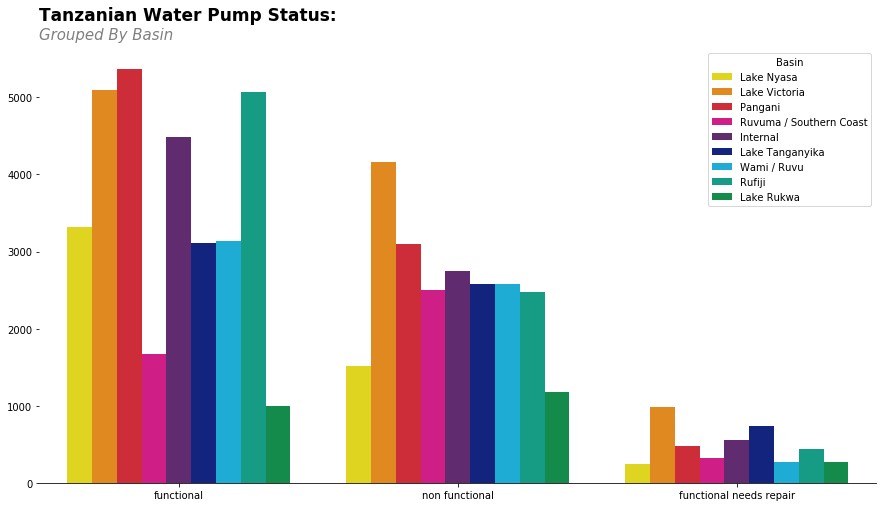

In [267]:
# Using the five thirty eight style
# Little details
plt.style.context('fivethirtyeight')
colors = ['#fff100', '#ff8c00', '#e81123', '#ec008c', '#68217a','#00188f', '#00bcf2', '#00b294', '#009e49', '#bad80a']
sns.set_palette(colors, 10)
plt.figure(figsize=(15,8))

# Setting plot and details
ax = sns.countplot(x = "status_group", hue="basin", data=df)
ax.text(s="Tanzanian Water Pump Status:", y=6000, x=-0.5, fontsize=17, fontweight='semibold');
ax.text(s="Grouped By Basin", y=5750, x=-0.5, fontsize=15, fontstyle='italic', color='gray')
l = ax.legend()
l.set_title('Basin')
sns.despine(ax=ax, left=True)
ax.set_ylabel("");
ax.set_xlabel("");

### **Plot #2**

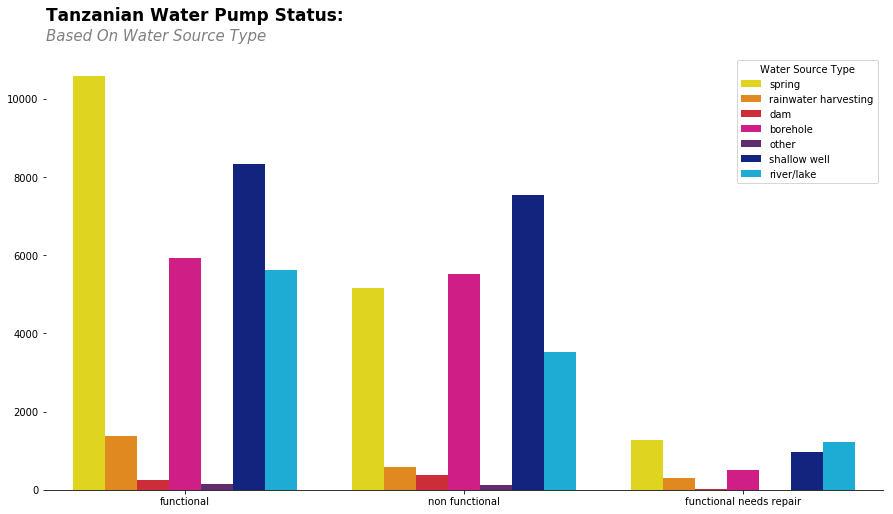

In [268]:
# Using the five thirty eight style
# Little details
plt.style.context('fivethirtyeight')
colors = ['#fff100', '#ff8c00', '#e81123', '#ec008c', '#68217a','#00188f', '#00bcf2', '#00b294', '#009e49', '#bad80a']
sns.set_palette(colors, 10)
plt.figure(figsize=(15,8))

# Setting plot and details
ax = sns.countplot(x = "status_group", hue="source_type", data=df)
ax.text(s="Tanzanian Water Pump Status:", y=12000, x=-0.5, fontsize=17, fontweight='semibold');
ax.text(s="Based On Water Source Type", y=11500, x=-0.5, fontsize=15, fontstyle='italic', color='gray')
l = ax.legend()
l.set_title('Water Source Type')
sns.despine(ax=ax, left=True)
ax.set_ylabel("");
ax.set_xlabel("");

### **Plot #3**

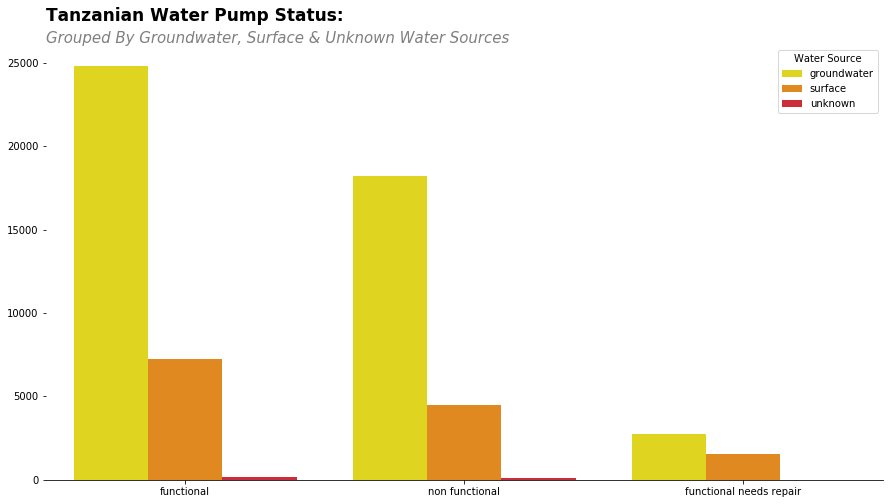

In [269]:
# Using the five thirty eight style
# Little details
plt.style.context('fivethirtyeight')
colors = ['#fff100', '#ff8c00', '#e81123', '#ec008c', '#68217a','#00188f', '#00bcf2', '#00b294', '#009e49', '#bad80a']
sns.set_palette(colors, 10)
plt.figure(figsize=(15,8))

# Setting plot and details
ax = sns.countplot(x = "status_group", hue="source_class", data=df)
ax.text(s="Tanzanian Water Pump Status:", y=27500, x=-0.5, fontsize=17, fontweight='semibold');
ax.text(s="Grouped By Groundwater, Surface & Unknown Water Sources", y=26200, x=-0.5, fontsize=15, fontstyle='italic', color='gray')
l = ax.legend()
l.set_title('Water Source')
sns.despine(ax=ax, left=True)
ax.set_ylabel("");
ax.set_xlabel("");

## Factfulness: Are things really as bad as they seem? 

In [270]:
# Classifying Construction Years 
new_construction_years = df[df.construction_year > 0]
yr_list = new_construction_years.construction_year.unique().tolist()
yr_list = sorted(yr_list, reverse=True)
new_construction_years = new_construction_years.construction_year.value_counts(normalize=True).tolist()
new_construction_years

# Making selection
selection = choice(yr_list, 20709, p=new_construction_years)
df = df.sort_values('construction_year')
df.construction_year[0:20709] = selection

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# Binning
df['construction_binning'] = pd.cut(df['construction_year'], bins=10)

### **Plot #4**

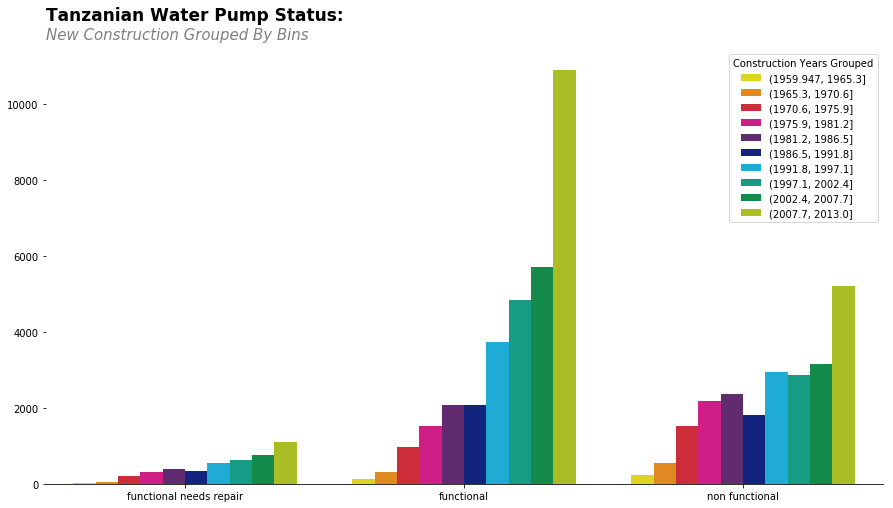

In [282]:
# Using the five thirty eight style
# Little details
plt.style.context('fivethirtyeight')
colors = ['#fff100', '#ff8c00', '#e81123', '#ec008c', '#68217a','#00188f', '#00bcf2', '#00b294', '#009e49', '#bad80a']
sns.set_palette(colors, 10)
plt.figure(figsize=(15,8))

# Setting plot and details
ax = sns.countplot(x = "status_group", hue="construction_binning", data=df);
ax.text(s="Tanzanian Water Pump Status:", y=12200, x=-0.5, fontsize=17, fontweight='semibold');
ax.text(s="New Construction Grouped By Bins", y=11700, x=-0.5, fontsize=15, fontstyle='italic', color='gray')
l = ax.legend()
l.set_title('Construction Years Grouped')
sns.despine(ax=ax, left=True)
ax.set_ylabel("");
ax.set_xlabel("");

### **Plot #5**

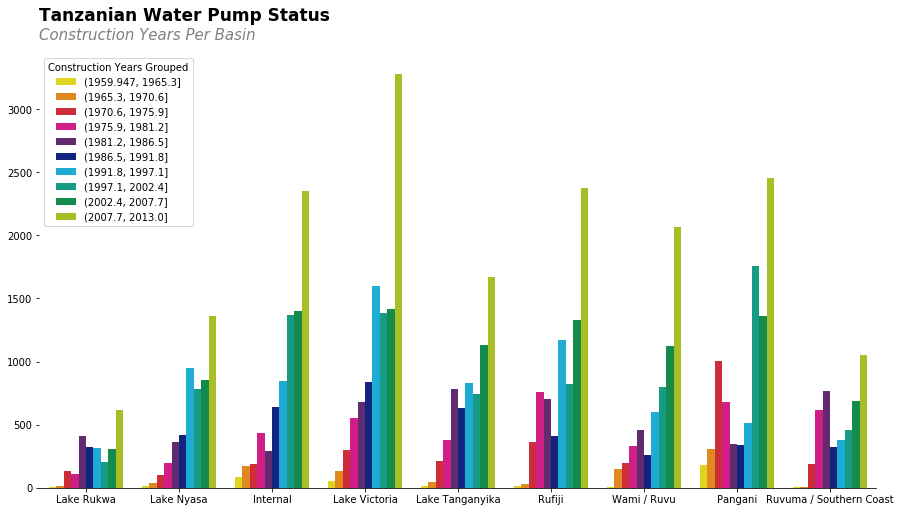

In [288]:
# Using the five thirty eight style
# Little details
plt.style.context('fivethirtyeight')
colors = ['#fff100', '#ff8c00', '#e81123', '#ec008c', '#68217a','#00188f', '#00bcf2', '#00b294', '#009e49', '#bad80a']
sns.set_palette(colors, 10)
plt.figure(figsize=(15,8))

# Setting plot and details
ax= sns.countplot(x = "basin", hue="construction_binning", data=df)
ax.text(s="Tanzanian Water Pump Status", y=3700, x=-0.5, fontsize=17, fontweight='semibold');
ax.text(s="Construction Years Per Basin", y=3550, x=-0.5, fontsize=15, fontstyle='italic', color='gray')
ax.text(s="", y=3600, x=-0.5, fontsize=15, fontstyle='italic', color='gray')
l = ax.legend()
l.set_title('Construction Years Grouped')
sns.despine(ax=ax, left=True)
ax.set_ylabel("");
ax.set_xlabel("");



---

